In [6]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [44]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head(15)
churn_data_copy = churn_data.copy()

1) RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2) CustomerId — идентификатор клиента
3) Surname — фамилия клиента
4) CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5) Geography — страна клиента (банк международный)
6) Gender — пол клиента
7) Age — возраст клиента
8) Tenure — сколько лет клиент пользуется услугами банка
9) Balance — баланс на счетах клиента в банке
10) NumOfProducts — количество услуг банка, которые приобрёл клиент
11) HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12) IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13) EstimatedSalary — предполагаемая заработная плата клиента
14) Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

### <center>***Фронт работы***

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Для наглядного соотношения ушедших и лояльных клиентов необходимо построить 
круговую диаграмму

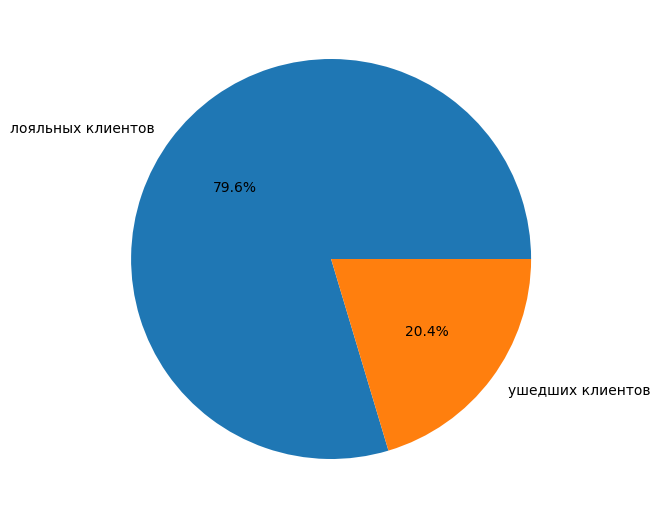

In [5]:
#Создаём переменну с котегореальным признаком ушедших(лояльных клиентов)
exited = churn_data['Exited']

#создаём пустой словарь
ratio_dict = {}
#создаём счётчики для ушедхих клиентов 
count_0 = 0
#создаём счётчики для лояльных клиентов
count_1 = 0

#Создаём цикл в котором будем считать ушедших клиентов и лояльных клиентов
for i in exited:
    if i == 0:
        count_0 +=1
    if i == 1:
        count_1 +=1
#помещаем в словарь полученные результаты
ratio_dict = {'лояльных клиентов': count_0,
    'ушедших клиентов' : count_1}
#преобразуем в формат Series           
ratio = pd.Series(ratio_dict).sort_values(ascending=False)


fig = plt.figure(figsize=(5, 5))
exefer = fig.add_axes([0, 0, 1, 1])#add_axes() добавляется координатная плоскость с списком из координат.
#В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1)
exefer.pie(
    ratio,
    labels=ratio.index,
    autopct='%.1f%%',
);


Из данного графика видно что соотношение ушедших клиентов(20,4%) и лояльных клиентов(79,6%) равна 4. То есть лояльных клиентов почти в 4 раза больше чем ушедших клиентов

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Для наглядного анализа необходимо построить boxplot

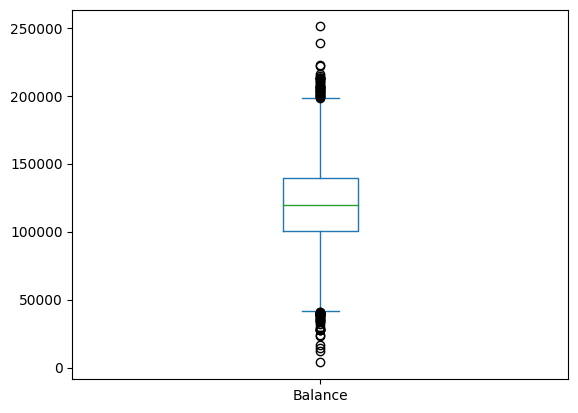

In [42]:
#churn_data['Balance'] = churn_data['Balance'].astype('int32') заменяем тип данных Balance с odject на int32 чтобы можно было прогнать через цикл


#создаем переменную чтобы прогнать через цикл
balance1 = churn_data['Balance']

# создаём список чтобы внести тудаи результат цикла
balance1_list = []

#создаём цикл для выделения из общего баланса, баланс свыше 2500 долларов
for i in balance1:
    if i > 2500:
        balance1_list.append(i)
#Заменяю в копированном датафрейме(чтобы не испортить основной) данные о балансах так чтобы в датафрейме хранились лишь балансы свыше 2500 дол.
churn_data_copy['Balance'] = pd.DataFrame({
    'Balance':balance1_list,
})
#строю коробчатую диаграмму
churn_data['Balance'].plot(kind='box');


На графике видно, что наша медиана находиться на 125000,это значит что в среднем у клиентов банка на счету в банке находится 125000 долларов,
усы обозначают диапазон данных по балансу клиента в банке, он колеблится от примерно 40000 до 190000 долларов. Выбросы показывают, что в наших данных существую клиенты у который не баланс аномален по сравнению с основной группой клиентов, присутсвутсвующие выбросыне сильно аномальны
Вывод:В среднем баланс клиентов составляет 125000 долларов, и в среднем баланс клиентов колеблится от 40000 до 190000

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Для наглядного анализа необходимо построить диаграмму распределения, необходимость заключается в определении взаимосвязей